**Author:** [Riccardo Guidotti](http://kdd.isti.cnr.it/people/riccardo-guidotti)  
**Python version:**  3.x

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# Data Preparation

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
df = pd.read_csv('AirPassengers.csv', parse_dates=True, index_col='Month', date_parser=dateparse)
df.head()

<ipython-input-2-88163272a03f>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


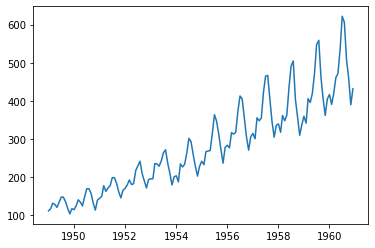

In [3]:
ts = df['#Passengers']
plt.plot(ts)
plt.show()

### Generate Random Time Series

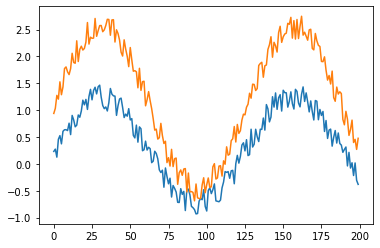

In [4]:
ts1 = pd.Series([np.sin(float(x)/20.)+np.random.rand()/2. for x in range(200)])
ts2 = pd.Series([1.5*np.sin(float(x)/20.)+np.random.rand()/2.+0.8 for x in range(200)])
plt.plot(ts1)
plt.plot(ts2)
plt.show()

# Transformations

### Transformation I: Offset Translation

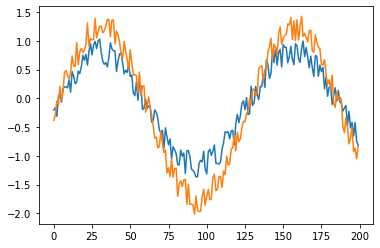

In [5]:
plt.plot(ts1 - ts1.mean())
plt.plot(ts2 - ts2.mean())
plt.show()

### Transformation II: Amplitude Scaling

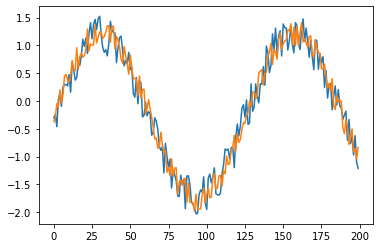

In [6]:
plt.plot((ts1 - ts1.mean())/ts1.std())
plt.plot((ts2 - ts2.mean())/ts2.std())
plt.show()

In [7]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

https://tslearn.readthedocs.io/en/latest/index.html

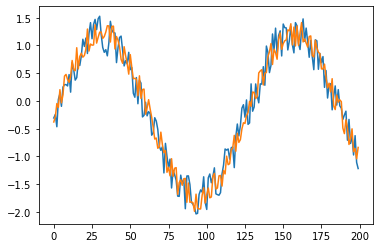

In [14]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
ts1_scaled = scaler.fit_transform(ts1.values.reshape(1, -1)).flatten()
ts2_scaled = scaler.fit_transform(ts2.values.reshape(1, -1)).flatten()

plt.plot(ts1_scaled)
plt.plot(ts2_scaled)
plt.show()

### Transformation IV: Noise (smoothing)

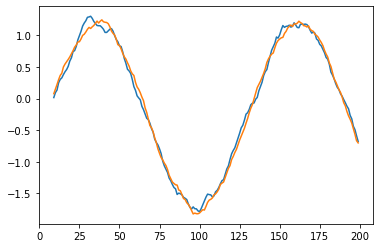

In [15]:
w = 10
plt.plot(((ts1 - ts1.mean())/ts1.std()).rolling(window=w).mean())
plt.plot(((ts2 - ts2.mean())/ts2.std()).rolling(window=w).mean())
plt.show()

### Transformation III: Trend removal

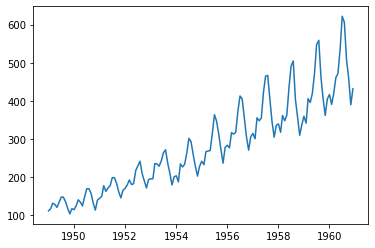

In [16]:
ts = df['#Passengers']
plt.plot(ts)
plt.show()

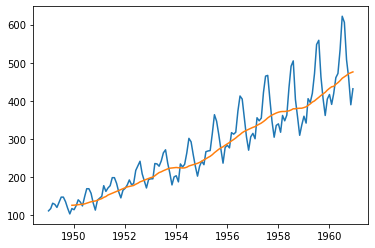

In [17]:
plt.plot(ts)
plt.plot(ts.rolling(window=12).mean())
plt.show()

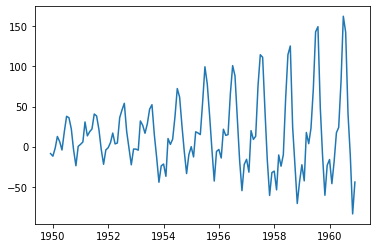

In [19]:
ts_shift = ts - ts.rolling(window=12).mean()
plt.plot(ts_shift)
plt.show()

In [14]:
#ts_shift2 = ts - ts.ewm(halflife=12).mean()
#plt.plot(ts_shift, 'r-')
#plt.plot(ts_shift2, 'b-')
#plt.show()

# Euclidean Distance

In [20]:
from scipy.spatial.distance import euclidean

In [21]:
dist = euclidean(ts1, ts2)
dist

13.736220465447271

In [22]:
dist = euclidean(ts1[:10], ts2[:10])
dist

3.0581556059971082

# Manhattan Distance

In [23]:
from scipy.spatial.distance import cityblock

In [24]:
dist = cityblock(ts1, ts2)
dist

177.04359793658966

In [25]:
dist = cityblock(ts1[:10], ts2[:10])
dist

9.514721932868893

# Dynamic Time Warping

In [26]:
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix

In [27]:
dist = dtw(ts1, ts2)
dist

8.543162336213472

In [28]:
dist = dtw(ts1[:10], ts2[:10])
dist

2.988942477133356

In [29]:
path, dist = dtw_path(ts1[:10], ts2[:10])

In [30]:
path

[(0, 0),
 (1, 0),
 (2, 0),
 (3, 0),
 (4, 0),
 (5, 1),
 (6, 2),
 (7, 3),
 (8, 4),
 (8, 5),
 (8, 6),
 (8, 7),
 (8, 8),
 (9, 9)]

In [31]:
from scipy.spatial.distance import cdist

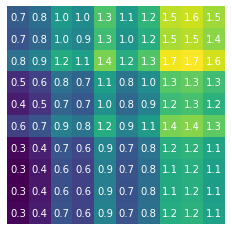

In [32]:
mat = cdist(ts1.values[:10].reshape(-1,1), ts2.values[:10].reshape(-1,1))

plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        text = plt.text(j, i, '%.1f' % mat[i, j], ha="center", va="center", color="w")
        
plt.show()

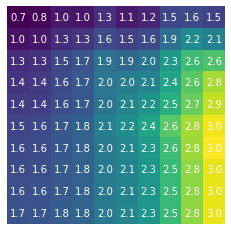

In [33]:
acc = subsequence_cost_matrix(ts1.values[:10].reshape(-1,1), ts2.values[:10].reshape(-1,1))

plt.imshow(acc)
plt.axis("off")
plt.autoscale(False)
for i in range(acc.shape[0]):
    for j in range(acc.shape[1]):
        text = plt.text(j, i, '%.1f' % np.sqrt(acc[i, j]), ha="center", va="center", color="w")
        
plt.show()

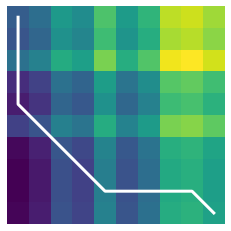

In [34]:
plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

In [30]:
path, dist = dtw_path(ts1[:10], ts2[:10], global_constraint="sakoe_chiba", sakoe_chiba_radius=2)
dist

3.1862505329970516

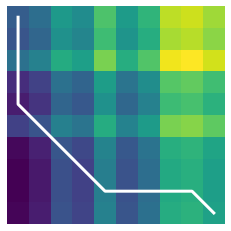

In [35]:
plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

In [36]:
path, dist = dtw_path(ts1[:10], ts2[:10], global_constraint="itakura", itakura_max_slope=2.)
dist

3.0549851158449797

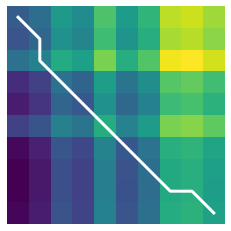

In [38]:
plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

In [39]:
cdist_dtw([ts1, ts2, ts])

array([[   0.        ,    8.54316234, 3732.93647549],
       [   8.54316234,    0.        , 3721.92093075],
       [3732.93647549, 3721.92093075,    0.        ]])

### DTW2 

In [40]:
from pyts.metrics import dtw as dtw2

In [41]:
dtw2(ts1[:10].ravel(), ts2[:10].ravel())

2.988942477133356

In [42]:
dtw2(ts1[:10].ravel(), ts2[:10].ravel(), dist='absolute')

9.514721932868893

In [43]:
dtw2(ts1[:10].ravel(), ts2[:10].ravel(), dist='square', method='fast')

3.0581556059971082

In [44]:
dtw2(ts1[:10].ravel(), ts2[:10].ravel(), dist='absolute', method='fast')

9.514721932868893

# Features Extraction

In [45]:
import numpy as np
import scipy.stats as stats

In [46]:
def calculate_features(values):
    features = {
        'avg': np.mean(values),
        'std': np.std(values),
        'var': np.var(values),
        'med': np.median(values),
        '10p': np.percentile(values, 10),
        '25p': np.percentile(values, 25),
        '50p': np.percentile(values, 50),
        '75p': np.percentile(values, 75),
        '90p': np.percentile(values, 90),
        'iqr': np.percentile(values, 75) - np.percentile(values, 25),
        'cov': 1.0 * np.mean(values) / np.std(values),
        'skw': stats.skew(values),
        'kur': stats.kurtosis(values)
    }

    return features

In [47]:
features = calculate_features(ts)

In [48]:
features

{'avg': 280.2986111111111,
 'std': 119.54904153277148,
 'var': 14291.97333140432,
 'med': 265.5,
 '10p': 135.3,
 '25p': 180.0,
 '50p': 265.5,
 '75p': 360.5,
 '90p': 453.20000000000044,
 'iqr': 180.5,
 'cov': 2.3446328595974064,
 'skw': 0.577068234901525,
 'kur': -0.39377217091281036}

In [51]:
from tsfresh.feature_extraction import extract_features

https://tsfresh.readthedocs.io/en/latest/index.html

In [52]:
df['id'] = [0] * len(df)

In [53]:
features = extract_features(timeseries_container=df, column_id='id')

Feature Extraction: 100%|██████████| 1/1 [00:03<00:00,  3.41s/it]


In [54]:
features.to_dict()

{'#Passengers__variance_larger_than_standard_deviation': {0: 1.0},
 '#Passengers__has_duplicate_max': {0: 0.0},
 '#Passengers__has_duplicate_min': {0: 0.0},
 '#Passengers__has_duplicate': {0: 1.0},
 '#Passengers__sum_values': {0: 40363.0},
 '#Passengers__abs_energy': {0: 13371737.0},
 '#Passengers__mean_abs_change': {0: 25.86013986013986},
 '#Passengers__mean_change': {0: 2.237762237762238},
 '#Passengers__mean_second_derivative_central': {0: 0.1267605633802817},
 '#Passengers__median': {0: 265.5},
 '#Passengers__mean': {0: 280.2986111111111},
 '#Passengers__length': {0: 144.0},
 '#Passengers__standard_deviation': {0: 119.54904153277147},
 '#Passengers__variation_coefficient': {0: 0.4265060074999156},
 '#Passengers__variance': {0: 14291.973331404319},
 '#Passengers__skewness': {0: 0.5831604861560892},
 '#Passengers__kurtosis': {0: -0.3649418621454963},
 '#Passengers__root_mean_square': {0: 304.72821451618523},
 '#Passengers__absolute_sum_of_changes': {0: 3698.0},
 '#Passengers__longest

# Compression-based Distances

In [55]:
import zlib
import string

In [56]:
s = "Hello world!"
print(s)
print(s.encode('utf-8'))
zlib.compress(s.encode('utf-8'))

Hello world!
b'Hello world!'


b'x\x9c\xf3H\xcd\xc9\xc9W(\xcf/\xcaIQ\x04\x00\x1d\t\x04^'

In [57]:
def CDM(x, y):
    return len(zlib.compress(x + y)) / (len(zlib.compress(x)) + len(zlib.compress(y)))

In [58]:
ts1_str = (' '.join([str(v) for v in ts1[:10]])).encode('utf-8')
ts1_str

b'0.23081771349521024 0.2736303222108254 0.12441474602447367 0.4567712219409068 0.5252106759896844 0.37216968405384665 0.6056760395632133 0.6344618607472287 0.6361604554598792 0.6196209695624006'

In [59]:
ts2_str = (' '.join([str(v) for v in ts2[:10]])).encode('utf-8')
ts2_str

b'0.9387728788331099 1.0334239981868258 1.2750052971909516 1.2055316752158236 1.5273130254504927 1.287645498698724 1.4327150898323264 1.7745845404424916 1.805228804544679 1.7134348135211377'

In [60]:
print("len(ts1_str + ts2_str): ", len(ts1_str + ts2_str))
print("len(compress(ts1_str+ts2_str)): ", len(zlib.compress(ts1_str+ts2_str)))
print("len(compress(ts1_str)): ", len(zlib.compress(ts1_str)))
print("len(compress(ts2_str)): ", len(zlib.compress(ts2_str)))
print("CDM = ", CDM(ts1_str, ts2_str))

len(ts1_str + ts2_str):  379
len(compress(ts1_str+ts2_str)):  200
len(compress(ts1_str)):  110
len(compress(ts2_str)):  110
CDM =  0.9090909090909091


In [61]:
ts1_str = (' '.join([str(v) for v in ts1])).encode('utf-8')
ts2_str = (' '.join([str(v) for v in ts2])).encode('utf-8')

print("len(ts1_str + ts2_str): ", len(ts1_str + ts2_str))
print("len(compress(ts1_str+ts2_str)): ", len(zlib.compress(ts1_str+ts2_str)))
print("len(compress(ts1_str)): ", len(zlib.compress(ts1_str)))
print("len(compress(ts2_str)): ", len(zlib.compress(ts2_str)))
print("CDM = ", CDM(ts1_str, ts2_str))

len(ts1_str + ts2_str):  7692
len(compress(ts1_str+ts2_str)):  3802
len(compress(ts1_str)):  1918
len(compress(ts2_str)):  1900
CDM =  0.9958093242535359


# Time Series Approximation

In [62]:
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation

In [64]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
ts = scaler.fit_transform(ts.values.reshape(1,-1))
ts1 = scaler.fit_transform(ts1.values.reshape(1,-1))
ts2 = scaler.fit_transform(ts2.values.reshape(1,-1))

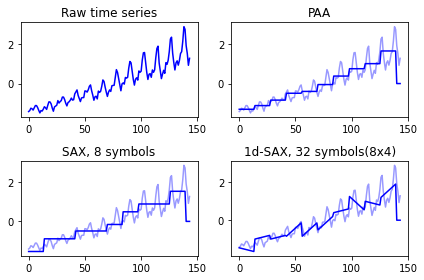

In [65]:
# PAA transform (and inverse transform) of the data
n_paa_segments = 10
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
ts_paa = paa.fit_transform(ts)
paa_dataset_inv = paa.inverse_transform(ts_paa)

# SAX transform
n_sax_symbols = 8
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
ts_sax = sax.fit_transform(ts)
sax_dataset_inv = sax.inverse_transform(ts_sax)

# 1d-SAX transform
n_sax_symbols_avg = 8
n_sax_symbols_slope = 4
one_d_sax = OneD_SymbolicAggregateApproximation(
    n_segments=n_paa_segments,
    alphabet_size_avg=n_sax_symbols_avg,
    alphabet_size_slope=n_sax_symbols_slope)

ts_sax1d = one_d_sax.fit_transform(ts)
one_d_sax_dataset_inv = one_d_sax.inverse_transform(ts_sax1d)

plt.figure()
plt.subplot(2, 2, 1)  # First, raw time series
plt.plot(ts[0].ravel(), "b-")
plt.title("Raw time series")

plt.subplot(2, 2, 2)  # Second, PAA
plt.plot(ts[0].ravel(), "b-", alpha=0.4)
plt.plot(paa_dataset_inv[0].ravel(), "b-")
plt.title("PAA")

plt.subplot(2, 2, 3)  # Then SAX
plt.plot(ts[0].ravel(), "b-", alpha=0.4)
plt.plot(sax_dataset_inv[0].ravel(), "b-")
plt.title("SAX, %d symbols" % n_sax_symbols)

plt.subplot(2, 2, 4)  # Finally, 1d-SAX
plt.plot(ts[0].ravel(), "b-", alpha=0.4)
plt.plot(one_d_sax_dataset_inv[0].ravel(), "b-")
plt.title("1d-SAX, %d symbols"
          "(%dx%d)" % (n_sax_symbols_avg * n_sax_symbols_slope,
                       n_sax_symbols_avg,
                       n_sax_symbols_slope))

plt.tight_layout()
plt.show()

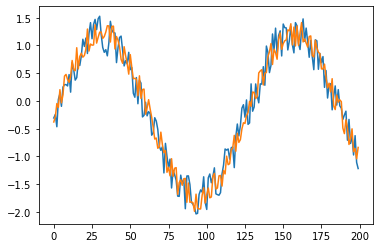

In [66]:
plt.plot(ts1[0].ravel())
plt.plot(ts2[0].ravel())
plt.show()

In [67]:
ts1_paa = paa.fit_transform(ts1)
ts2_paa = paa.fit_transform(ts2)

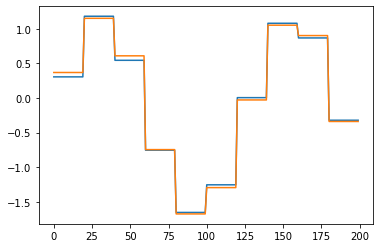

In [68]:
plt.plot(paa.inverse_transform(ts1_paa)[0].ravel())
plt.plot(paa.inverse_transform(ts2_paa)[0].ravel())
plt.show()

In [69]:
ts1_str = (' '.join([str(v) for v in ts1_paa[0].ravel()])).encode('utf-8')
ts2_str = (' '.join([str(v) for v in ts2_paa[0].ravel()])).encode('utf-8')

print("len(ts1_str + ts2_str): ", len(ts1_str + ts2_str))
print("len(compress(ts1_str+ts2_str)): ", len(zlib.compress(ts1_str+ts2_str)))
print("len(compress(ts1_str)): ", len(zlib.compress(ts1_str)))
print("len(compress(ts2_str)): ", len(zlib.compress(ts2_str)))
print("CDM = ", CDM(ts1_str, ts2_str))

len(ts1_str + ts2_str):  391
len(compress(ts1_str+ts2_str)):  214
len(compress(ts1_str)):  119
len(compress(ts2_str)):  120
CDM =  0.895397489539749


In [70]:
ts1_sax = sax.fit_transform(ts1)
ts2_sax = sax.fit_transform(ts2)

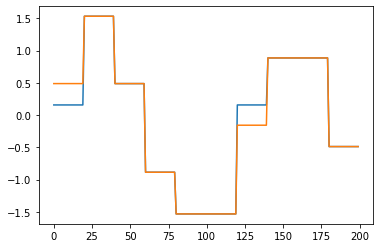

In [71]:
plt.plot(sax.inverse_transform(ts1_sax)[0].ravel())
plt.plot(sax.inverse_transform(ts2_sax)[0].ravel())
plt.show()

In [72]:
ts1_str = (' '.join([str(v) for v in ts1_sax[0].ravel()])).encode('utf-8')
ts2_str = (' '.join([str(v) for v in ts2_sax[0].ravel()])).encode('utf-8')

print("len(ts1_str + ts2_str): ", len(ts1_str + ts2_str))
print("len(compress(ts1_str+ts2_str)): ", len(zlib.compress(ts1_str+ts2_str)))
print("len(compress(ts1_str)): ", len(zlib.compress(ts1_str)))
print("len(compress(ts2_str)): ", len(zlib.compress(ts2_str)))
print("CDM = ", CDM(ts1_str, ts2_str))

len(ts1_str + ts2_str):  38
len(compress(ts1_str+ts2_str)):  30
len(compress(ts1_str)):  24
len(compress(ts2_str)):  24
CDM =  0.625


In [73]:
ts1_sax1d = one_d_sax.fit_transform(ts1)
ts2_sax1d = one_d_sax.fit_transform(ts2)

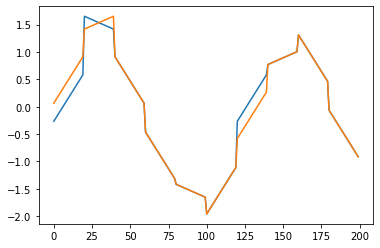

In [74]:
plt.plot(one_d_sax.inverse_transform(ts1_sax1d)[0].ravel())
plt.plot(one_d_sax.inverse_transform(ts2_sax1d)[0].ravel())
plt.show()

In [75]:
ts1_str = (' '.join([str(v) for v in ts1_sax1d[0].ravel()])).encode('utf-8')
ts2_str = (' '.join([str(v) for v in ts2_sax1d[0].ravel()])).encode('utf-8')

print("len(ts1_str + ts2_str): ", len(ts1_str + ts2_str))
print("len(compress(ts1_str+ts2_str)): ", len(zlib.compress(ts1_str+ts2_str)))
print("len(compress(ts1_str)): ", len(zlib.compress(ts1_str)))
print("len(compress(ts2_str)): ", len(zlib.compress(ts2_str)))
print("CDM = ", CDM(ts1_str, ts2_str))

len(ts1_str + ts2_str):  78
len(compress(ts1_str+ts2_str)):  45
len(compress(ts1_str)):  36
len(compress(ts2_str)):  35
CDM =  0.6338028169014085


# Clustering

## Shape-based Clustering

In [76]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.generators import random_walks

In [77]:
X = random_walks(n_ts=50, sz=32, d=1)

In [78]:
X.shape

(50, 32, 1)

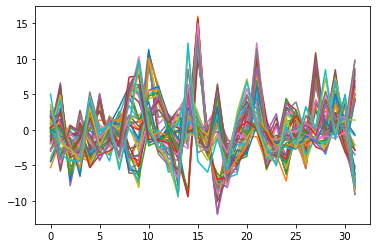

In [79]:
plt.plot(X.reshape(X.shape[1], X.shape[0]))
plt.show()

In [80]:
km = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=5, random_state=0)
km.fit(X)

TimeSeriesKMeans(max_iter=5, random_state=0)

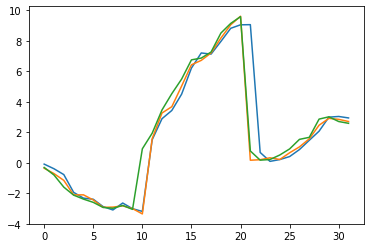

In [81]:
plt.plot(km.cluster_centers_.reshape(X.shape[1], 3))
plt.show()

In [82]:
km.labels_

array([0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 1, 2, 2, 0, 0, 0, 0,
       2, 1, 0, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2,
       0, 1, 2, 0, 1, 0])

In [83]:
km.inertia_

177.08970107427885

In [84]:
km_dtw = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=5, random_state=0)
km_dtw.fit(X)

TimeSeriesKMeans(max_iter=5, metric='dtw', random_state=0)

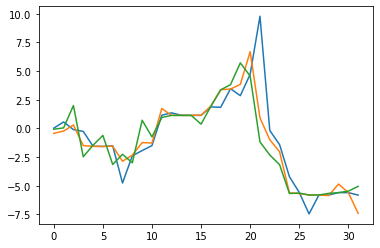

In [85]:
plt.plot(km_dtw.cluster_centers_.reshape(X.shape[1], 3))
plt.show()

In [86]:
km_dtw.labels_

array([2, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2,
       1, 1, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 2, 0, 0, 2, 0, 0, 2, 0, 1, 0,
       0, 1, 0, 0, 1, 2])

In [87]:
km_dtw.inertia_

43.6716026503616

## Features-based Clustering

In [88]:
from sklearn.cluster import KMeans

In [89]:
F = [list(calculate_features(x).values())[:-2] for x in X]

In [90]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(F)

KMeans(n_clusters=3)

In [91]:
kmeans.inertia_

1808.6397588985533

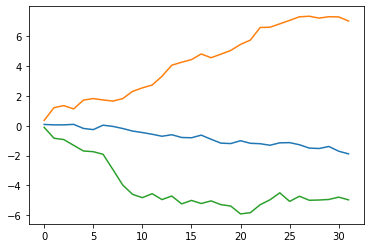

In [92]:
for i in range(3):
    plt.plot(np.mean(X[np.where(kmeans.labels_ == i)[0]], axis=0))
plt.show()

# Compression-based Clustering

In [93]:
from sklearn.metrics import pairwise_distances

In [94]:
def cdm_dist(x, y):
    x_str = (' '.join([str(v) for v in x.ravel()])).encode('utf-8')
    y_str = (' '.join([str(v) for v in y.ravel()])).encode('utf-8')
    return len(zlib.compress(x_str + y_str)) / (len(zlib.compress(x_str)) + len(zlib.compress(y_str)))

In [95]:
M = pairwise_distances(X.reshape(X.shape[0], X.shape[1]), metric=cdm_dist)

In [96]:
M.shape

(50, 50)

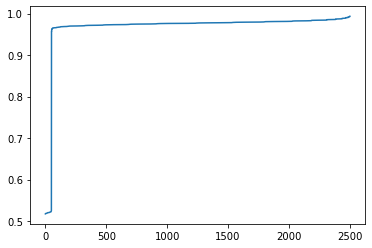

In [97]:
plt.plot(sorted(M.ravel()))
plt.show()

In [98]:
from sklearn.cluster import DBSCAN

In [99]:
dbscan = DBSCAN(eps=0.965, min_samples=5, metric='precomputed')
dbscan.fit(M)

DBSCAN(eps=0.965, metric='precomputed')

In [100]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  0, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1])

# Approximated Clustering

In [101]:
n_paa_segments = 10
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(X)

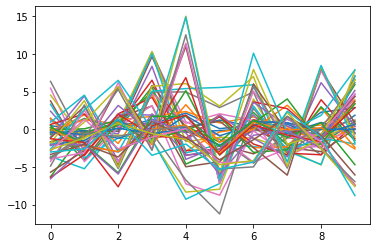

In [102]:
plt.plot(X_paa.reshape(X_paa.shape[1], X_paa.shape[0]))
plt.show()

In [103]:
km = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=5, random_state=0)
km.fit(X_paa)

TimeSeriesKMeans(max_iter=5, random_state=0)

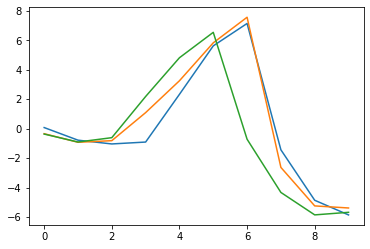

In [104]:
plt.plot(km.cluster_centers_.reshape(X_paa.shape[1], 3))
plt.show()

In [105]:
km.labels_

array([0, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 2,
       0, 1, 0, 0, 2, 1, 2, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 2])

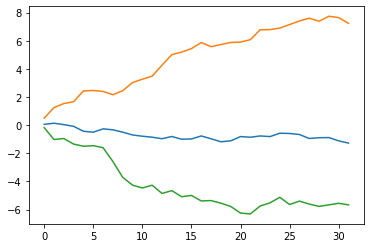

In [106]:
for i in range(3):
    plt.plot(np.mean(X[np.where(km.labels_ == i)[0]], axis=0))
plt.show()